# *Project. Data Analysis and Modeling* <br>

## Goal
> #### EDA : Analysis of trends
> #### Modeling : Predicting 'Price"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = "/content/drive/MyDrive/Car Sales.xlsx - car_data.csv"

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
## Starting the important tensorflow and sklearn libaries
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier as SGDC
import pickle

In [8]:
data = pd.read_csv(path)

In [9]:
print(data.head(5))

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

In [10]:
print(data.tail(5))

             Car_id        Date Customer Name  Gender  Annual Income  \
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                          Dealer_Name    Company    Model  \
23901                C & M Motors Inc   Plymouth  Voyager   
23902  Ryder Truck Rental and Leasing  Chevrolet    Prizm   
23903          Chrysler of Tri-Cities        BMW     328i   
23904               Chrysler Plymouth  Chevrolet    Metro   
23905                 Pars Auto Sales      Lexus    ES300   

                          Engine Transmission       Color  Price ($)  \
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Blac

In [11]:
print(data.isnull().sum())

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


In [12]:
data['Customer Name'] = data['Customer Name'].bfill()
data.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [13]:
data.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None


In [15]:
data.shape

(23906, 16)

Text(0.5, 1.0, 'Distribution of prices')

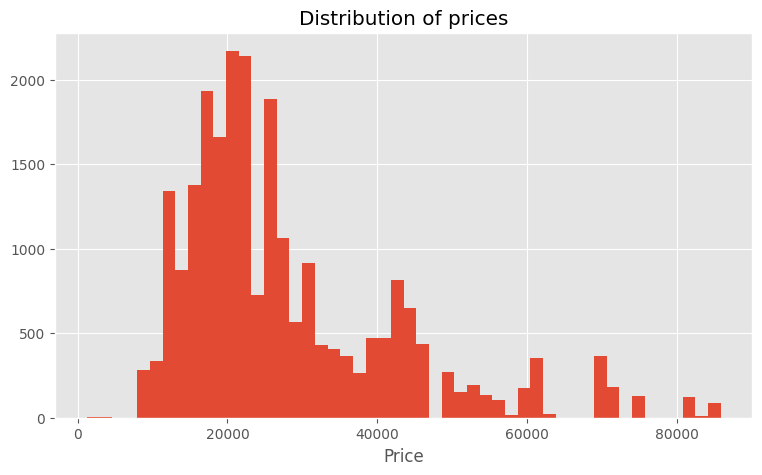

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
data['Price ($)'].hist(bins=50, ax=ax)
plt.xlabel('Price')
plt.title('Distribution of prices')

Text(0.5, 1.0, 'Distribution of Manufactures')

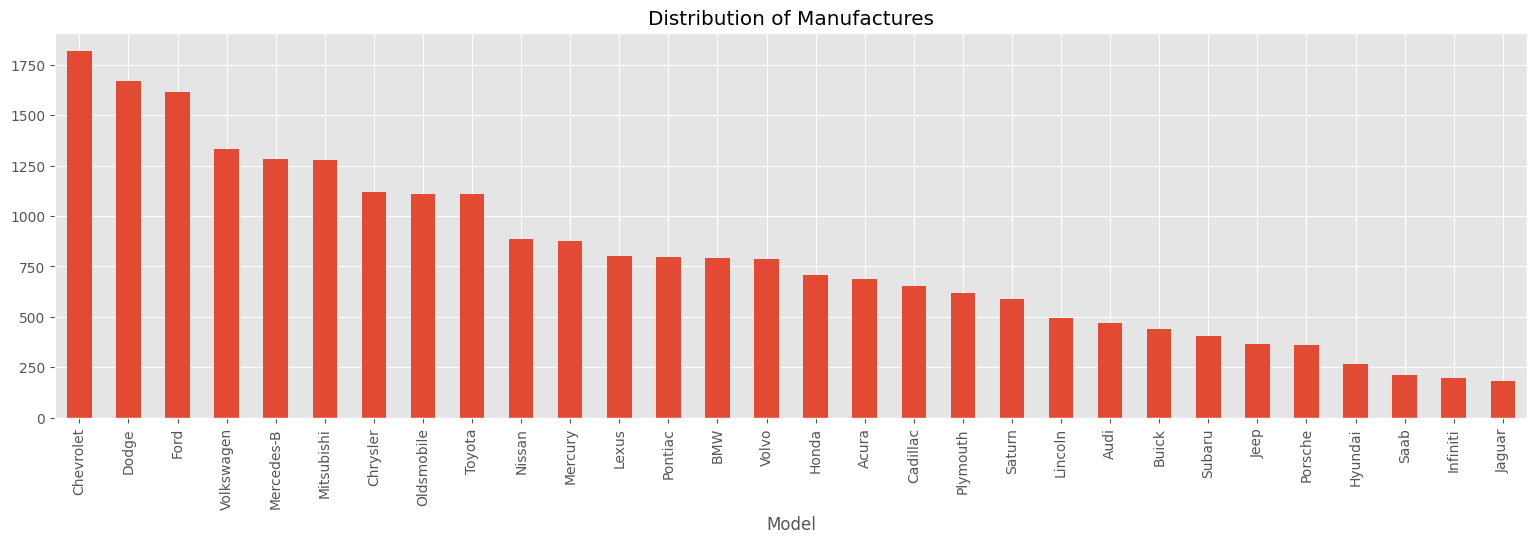

In [17]:
#Car Manufacture
fig1, ax1 = plt.subplots(1, 1, figsize = (19,5))
data['Company'].value_counts().plot(ax=ax1, kind='bar')
plt.xlabel('Model')
plt.title('Distribution of Manufactures')

Text(0.5, 1.0, 'Distribution of Gender')

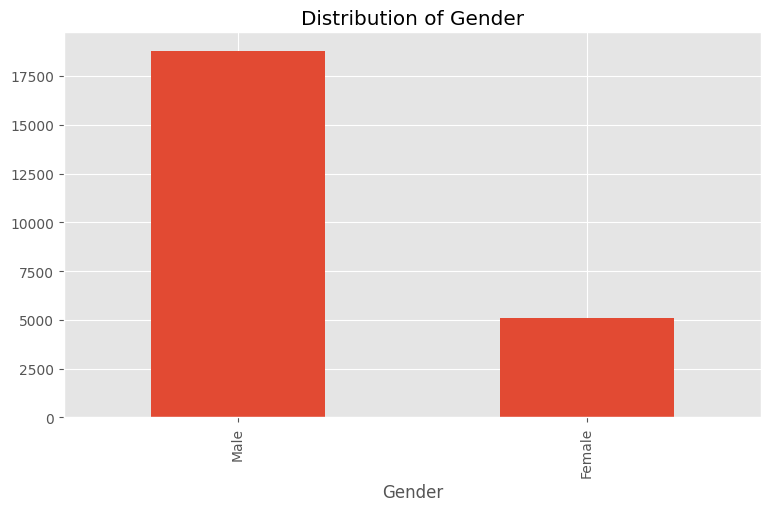

In [18]:
# Customer Gender
fig2, ax2 = plt.subplots(1, 1, figsize = (9,5))
data['Gender'].value_counts().plot(ax=ax2, kind='bar')
plt.xlabel('Gender')
plt.title('Distribution of Gender')

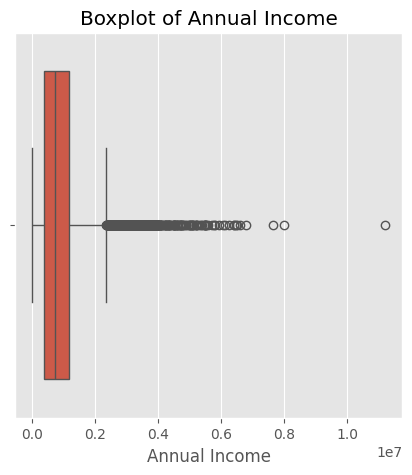

In [19]:
features = ['Annual Income']


for i, feature in enumerate(features):
    plt.subplots(1, 1, figsize=(5, 5))  # 2 rows, 3 columns
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')

plt.show()

# Data Analysis

Most sells car by model


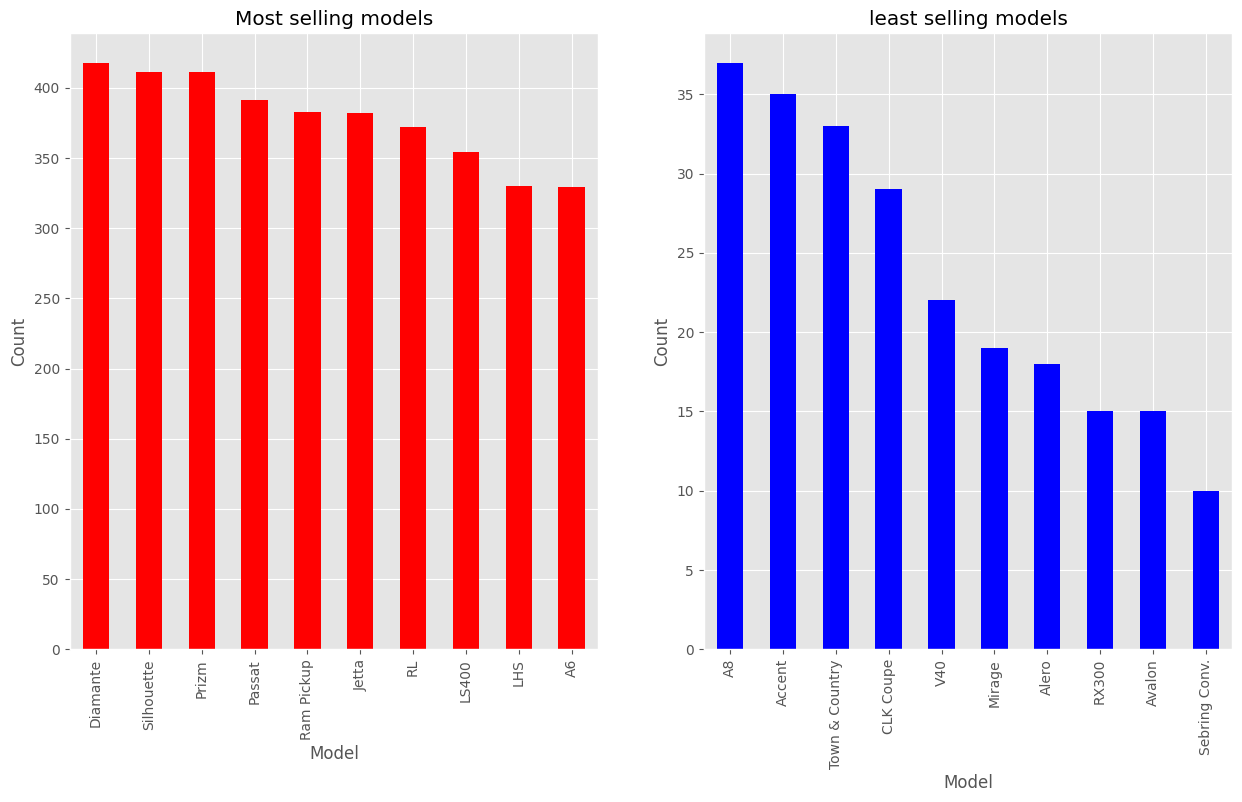

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,8))

top_models=data.Model.value_counts().head(10)
least_models=data.Model.value_counts().tail(10)

top_models.plot(kind='bar',color='r',ax=ax[0])
ax[0].set_title('Most selling models')
ax[0].set_ylabel('Count')

least_models.plot(kind='bar',color='b',ax=ax[1])
ax[1].set_title('least selling models')
ax[1].set_ylabel('Count')

plt.show()

Most sells car company

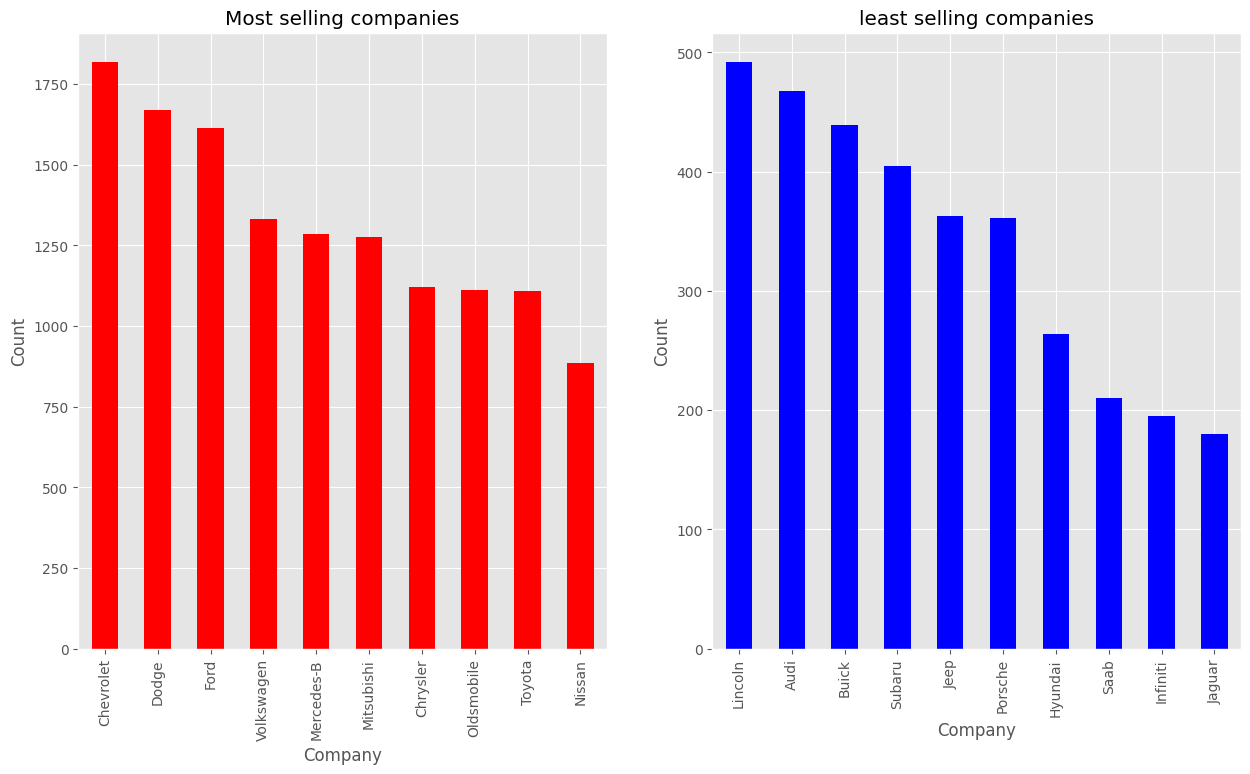

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,8))

top_companies=data.Company.value_counts().head(10)
least_companies=data.Company.value_counts().tail(10)

top_companies.plot(kind='bar',color='r',ax=ax[0])
ax[0].set_title('Most selling companies')
ax[0].set_ylabel('Count')

least_companies.plot(kind='bar',color='b',ax=ax[1])
ax[1].set_title('least selling companies')
ax[1].set_ylabel('Count')

plt.show()

customer demand of the color

In [22]:
data['Color'].value_counts()

Color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64

Text(0.5, 1.0, 'Most popular color')

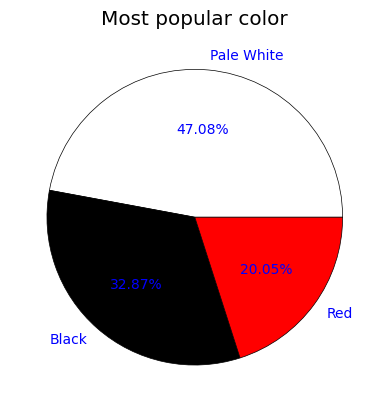

In [23]:
plt.pie(data['Color'].value_counts(),
        labels=data.Color.value_counts().index,colors=['white','k','red'],
        wedgeprops={'edgecolor':'black'},
        autopct='%1.2f%%',
        textprops={'color': 'blue'})
plt.title('Most popular color')

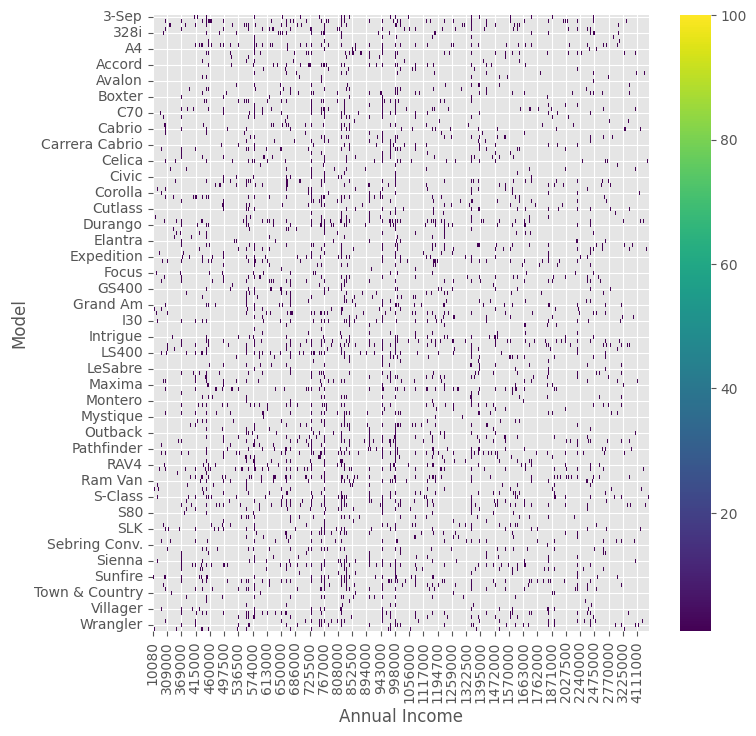

In [24]:
# @title Annual Income vs Model

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Model'].value_counts()
    for x_label, grp in data.groupby('Annual Income')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Annual Income')
_ = plt.ylabel('Model')

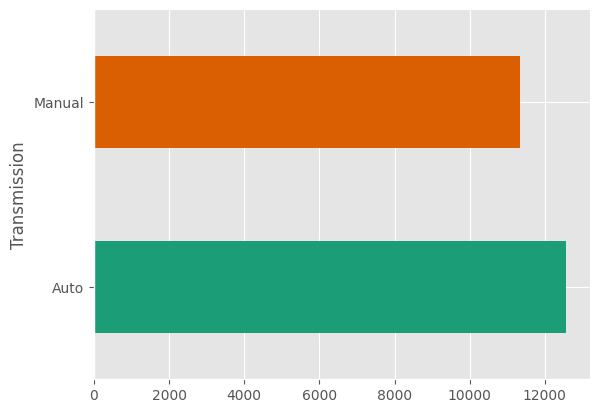

In [25]:
# @title Transmission

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Transmission').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## List of useful columns


* Gender
* Annual Income
* Company
* Model
* Transmission
* Color
* Price ($)
* Body Style

Since the other columns have no bearing on our research, they need to be eliminated.


In [26]:
dropped_columns = ['Car_id', 'Date', 'Customer Name', 'Dealer_Name', 'Engine', 'Phone']
data.drop(columns=dropped_columns, axis=1, inplace=True)
data.head()

,Gender,Annual Income,Company,Model,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,Male,13500,Ford,Expedition,Auto,Black,26000,06457-3834,SUV,Middletown
1,Male,1480000,Dodge,Durango,Auto,Black,19000,60504-7114,SUV,Aurora
2,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,38701-8047,Passenger,Greenville
3,Male,13500,Toyota,Celica,Manual,Pale White,14000,99301-3882,SUV,Pasco
4,Male,1465000,Acura,TL,Auto,Red,24500,53546-9427,Hatchback,Janesville


One-Hot Encoding and label encoding to make them easier to read by a computer


In [27]:
gender_le = LabelEncoder()
company_le = LabelEncoder()
model_le = LabelEncoder()
transmission_le = LabelEncoder()
body_le = LabelEncoder()
color_le = LabelEncoder()
region_le = LabelEncoder()

data_old = data
data_new = data['Price ($)']

encode = ['Gender', 'Company', 'Model', 'Transmission', 'Color', 'Dealer_Region', 'Body Style']

label = ['Price ($)']

enc_dict = {}
for e in encode:
    enc_dict[e] = LabelEncoder()
    data_old[e] = enc_dict[e].fit_transform(data_old[e])
data_old[features + label]

data_old.drop(data.columns[7], axis=1, inplace=True)
data_old.head()

,Gender,Annual Income,Company,Model,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1,13500,8,60,0,0,26000,3,4
1,1,1480000,7,52,0,0,19000,3,0
2,1,1035000,4,57,1,2,31500,2,2
3,1,13500,27,36,1,1,14000,3,5
4,1,1465000,0,141,0,2,24500,1,3


In [28]:
data_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender         23906 non-null  int64
 1   Annual Income  23906 non-null  int64
 2   Company        23906 non-null  int64
 3   Model          23906 non-null  int64
 4   Transmission   23906 non-null  int64
 5   Color          23906 non-null  int64
 6   Price ($)      23906 non-null  int64
 7   Body Style     23906 non-null  int64
 8   Dealer_Region  23906 non-null  int64
dtypes: int64(9)
memory usage: 1.6 MB


# ML Process

In [93]:
# independent variable
X=data.drop(['Annual Income'],axis=1).values
# dependent variable
Y=data['Annual Income'].values

Splitting the data to set up train_test_split using 70/30 split for training and testing respectively

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=23)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Linear Regression RMSE: {rmse:.2f}')

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R Squared: {r_squared:.2f}')

Linear Regression RMSE: 726325.46
R Squared: 0.00


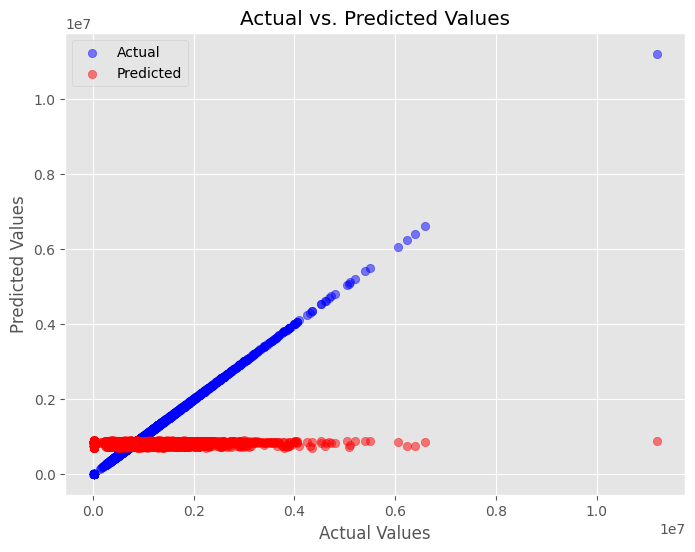

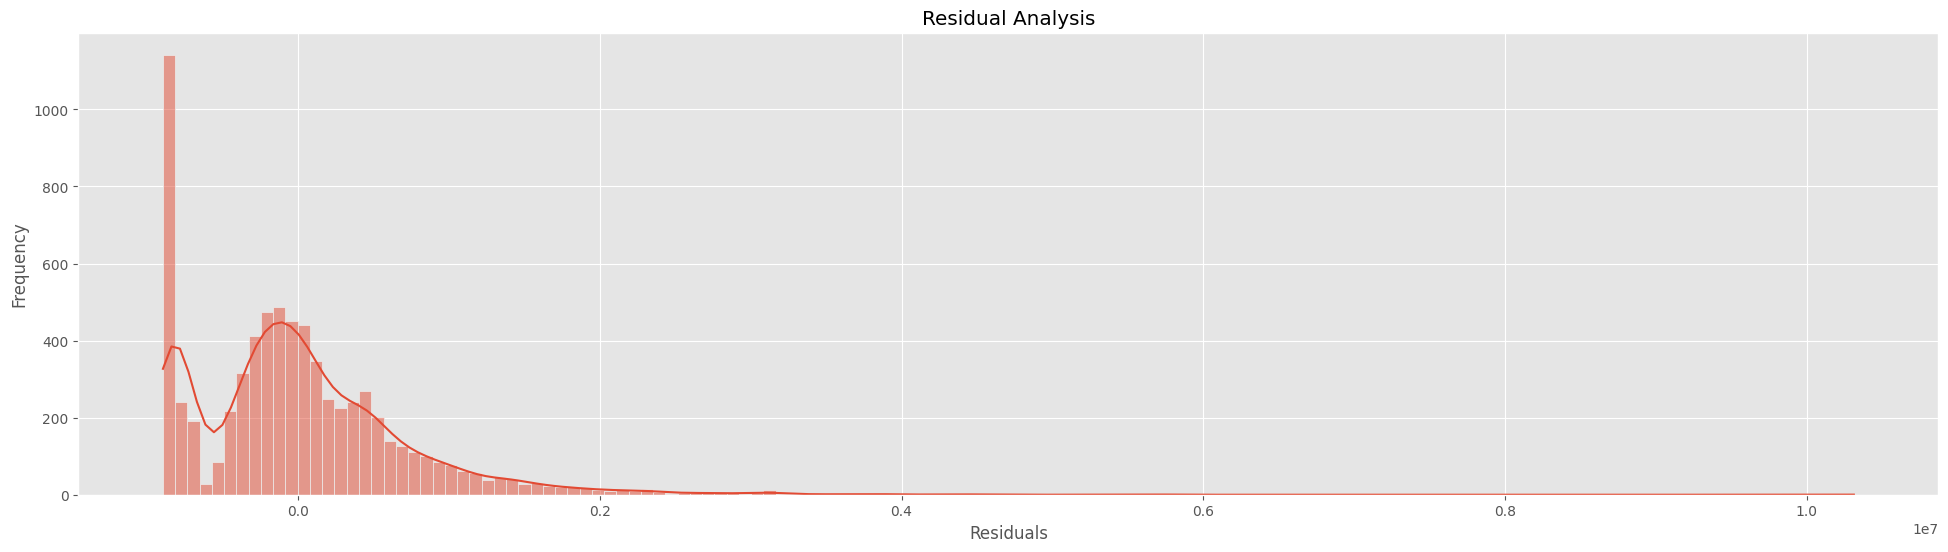

In [96]:
# Create a scatterplot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)
# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# Add a legend to distinguish between actual and predicted values
plt.legend(loc='best')
plt.show()

# Calculate residuals
residuals = y_test - y_pred
# Create residual plot
plt.figure(figsize=(24, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Analysis')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [97]:
import xgboost as xgb

# Initialize and train the XGBoost Regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # You can adjust parameters
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'Linear Regression RMSE: {rmse:.2f}')

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_xgb)
print(f'R Squared: {r_squared:.2f}')


Linear Regression RMSE: 736943.41
R Squared: -0.03


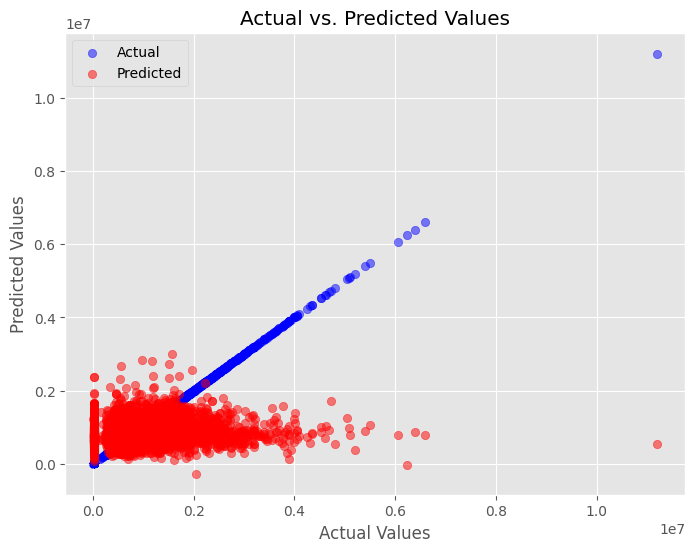

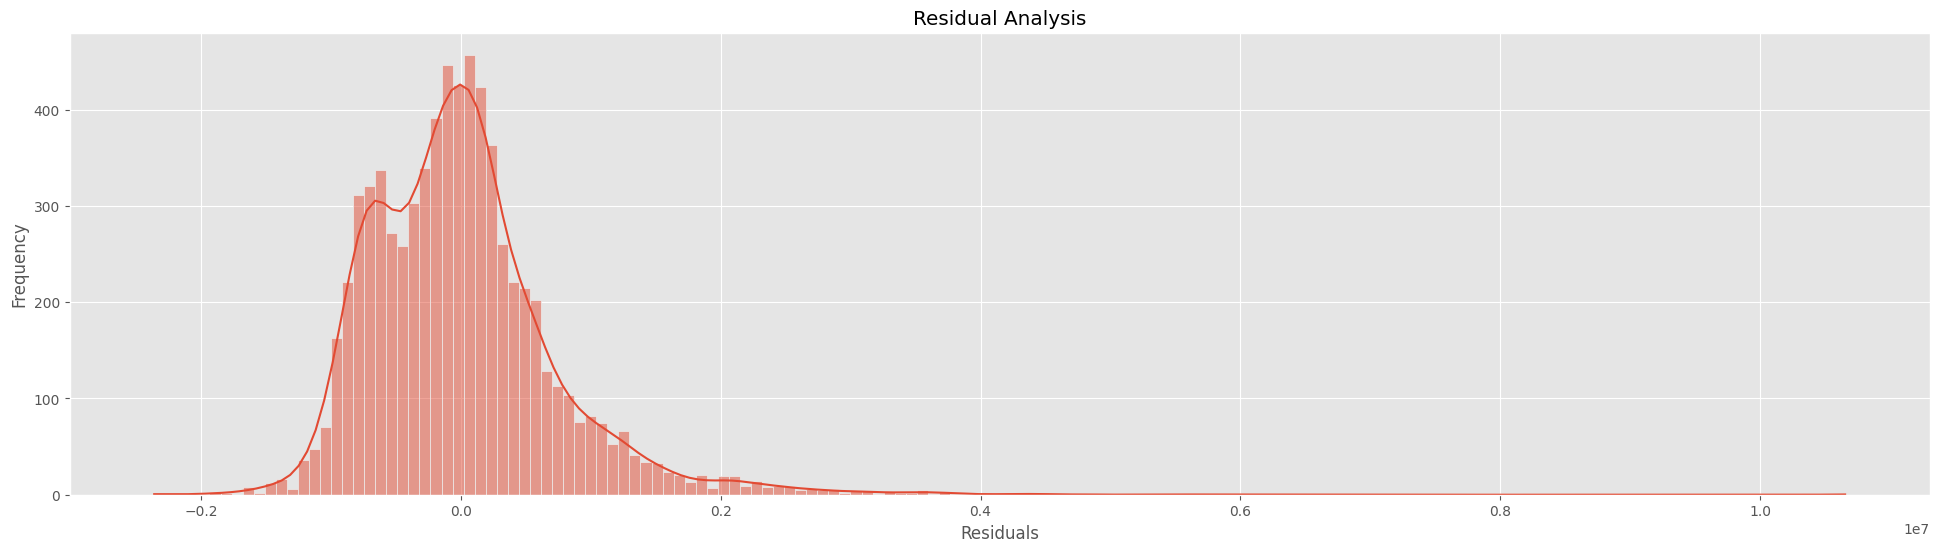

In [98]:
# Create a scatterplot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)
# Plot predicted values in red
plt.scatter(y_test, y_pred_xgb, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# Add a legend to distinguish between actual and predicted values
plt.legend(loc='best')
plt.show()

# Calculate residuals
residuals = y_test - y_pred_xgb
# Create residual plot
plt.figure(figsize=(24, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Analysis')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [99]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr_model = SVR(kernel='linear')  # You can try different kernels
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
print(f'Linear Regression RMSE: {rmse:.2f}')

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_svr)
print(f'R Squared: {r_squared:.2f}')

Linear Regression RMSE: 733698.70
R Squared: -0.02


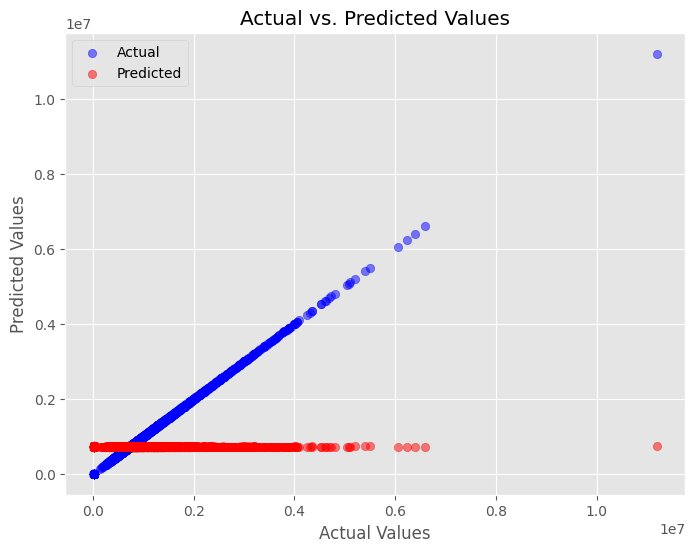

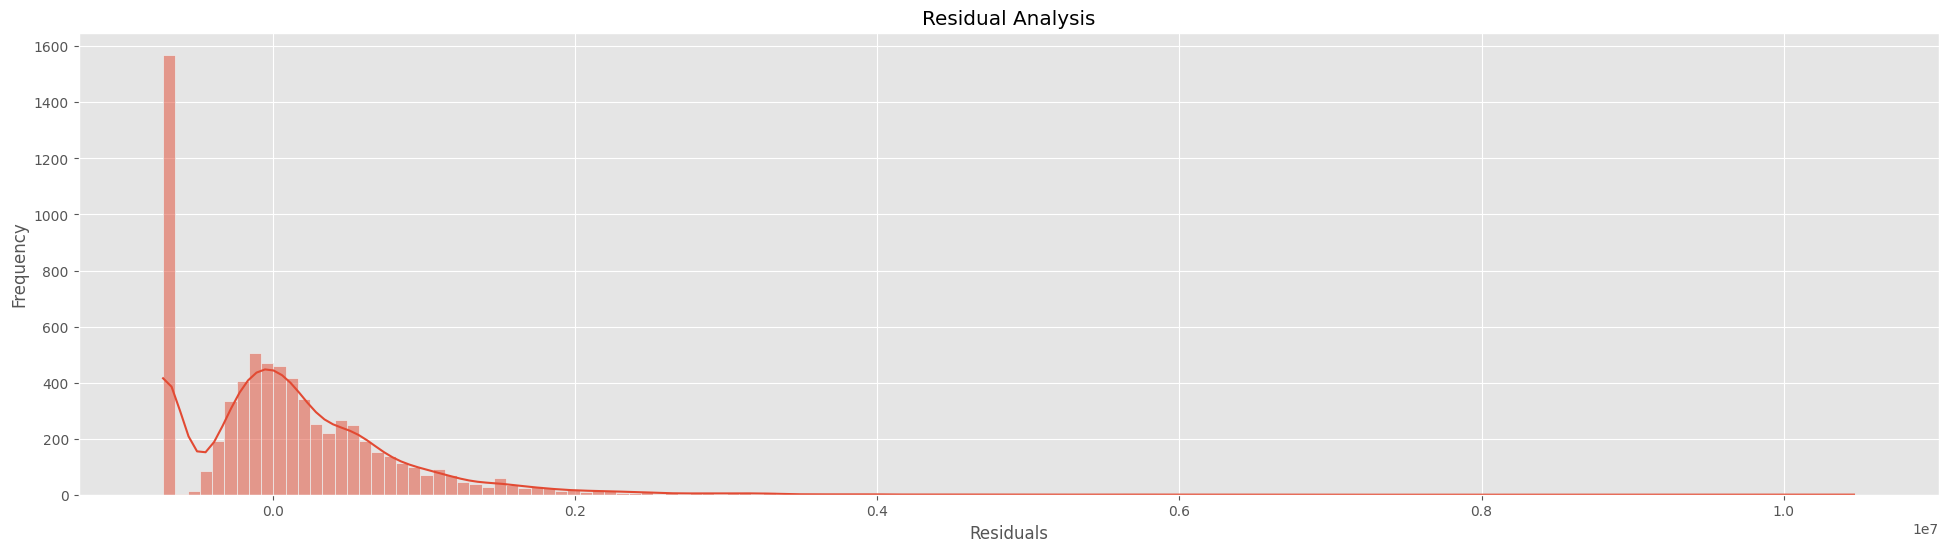

In [100]:
# Create a scatterplot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)
# Plot predicted values in red
plt.scatter(y_test, y_pred_svr, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# Add a legend to distinguish between actual and predicted values
plt.legend(loc='best')
plt.show()

# Calculate residuals
residuals = y_test - y_pred_svr
# Create residual plot
plt.figure(figsize=(24, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Analysis')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()